<a href="https://colab.research.google.com/github/ThomasTranGithub/Algo.Trading.Strategies/blob/main/annualreturns(Dec_5%2C_2023%2C_5_09_54_PM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT', 'TSLA', 'GOOG']

stock = yf.download(tickers, start="2010-10-17", end="2023-10-17", period="daily")

stock.head(10)



[*********************100%%**********************]  4 of 4 completed


Adj Close                                      Close             \
                AAPL       GOOG       MSFT      TSLA       AAPL       GOOG   
Date                                                                         
2010-10-18  9.627217  15.385083  19.869719  1.348667  11.357143  15.385083   
2010-10-19  9.369590  15.139005  19.315645  1.336667  11.053214  15.139005   
2010-10-20  9.401072  15.142741  19.477245  1.376667  11.090357  15.142741   
2010-10-21  9.370495  15.242617  19.561899  1.383333  11.054286  15.242617   
2010-10-22  9.308433  15.256067  19.531111  1.381333  10.981071  15.256067   
2010-10-25  9.349908  15.354946  19.384897  1.390000  11.030000  15.354946   
2010-10-26  9.325991  15.407250  19.931282  1.424000  11.001786  15.407250   
2010-10-27  9.319330  15.354199  20.046715  1.400000  10.993929  15.354199   
2010-10-28  9.240921  15.406752  20.223709  1.412667  10.901429  15.406752   
2010-10-29  9.111953  15.285207  20.523830  1.456000  10.749286  15.285207   

                                      High             ...        Low  \
                 MSFT      TSLA       AAPL       GOOG  ...       MSFT   
Date                                                   ...              
2010-10-18  25.820000  1.348667  11.392857  15.434398  ...  25.450001   
2010-10-19  25.100000  1.336667  11.206071  15.313103  ...  24.950001   
2010-10-20  25.309999  1.376667  11.223214  15.376864  ...  25.100000   
2010-10-21  25.420000  1.383333  11.240714  15.342493  ...  25.049999   
2010-10-22  25.379999  1.381333  11.072857  15.313103  ...  25.270000   
2010-10-25  25.190001  1.390000  11.128571  15.560177  ...  25.170000   
2010-10-26  25.900000  1.424000  11.062143  15.472754  ...  25.059999   
2010-10-27  26.049999  1.400000  11.067857  15.442119  ...  25.620001   
2010-10-28  26.280001  1.412667  11.000000  15.467026  ...  25.920000   
2010-10-29  26.670000  1.456000  10.924286  15.417213  ...  26.480000   

                           Open                                      Volume  \
                TSLA       AAPL       GOOG       MSFT      TSLA        AAPL   
Date                                                                          
2010-10-18  1.348000  11.373929  14.957685  25.590000  1.368000  1093010800   
2010-10-19  1.333333  10.835714  15.164410  25.270000  1.346667  1232784000   
2010-10-20  1.336000  11.035714  15.146726  25.260000  1.344000   721624400   
2010-10-21  1.363333  11.155714  15.230662  25.400000  1.374000   551460000   
2010-10-22  1.370000  11.038214  15.240873  25.520000  1.378667   372778000   
2010-10-25  1.382000  11.038929  15.332281  25.240000  1.396000   392462000   
2010-10-26  1.367333  10.959643  15.270263  25.120001  1.386667   392929600   
2010-10-27  1.376667  10.987500  15.336764  25.790001  1.416667   399002800   
2010-10-28  1.397333  10.998214  15.443364  26.209999  1.426000   551051200   
2010-10-29  1.403333  10.865357  15.369143  27.150000  1.409333   430511200   

                                           
                 GOOG       MSFT     TSLA  
Date                                       
2010-10-18  284992232   48330500  2442000  
2010-10-19  184203863   66150900  3678000  
2010-10-20  141532518   56283600  4687500  
2010-10-21  117257870   50032400  6256500  
2010-10-22   90582257   25837900  2416500  
2010-10-25  126809538   50912400  1777500  
2010-10-26  100892759   69304200  9913500  
2010-10-27   90012128   64805500  5347500  
2010-10-28   87699492   80730300  3363000  
2010-10-29   91473585  114193200  4209000  

[10 rows x 24 columns]

* Drop Uncesscary Columns
* Explore Price Movements

In [ ]:
stocks = stock.drop(columns=['Close', 'High', 'Low', 'Open', 'Volume'])

stocks.head(10)



Adj Close                                
                AAPL       GOOG       MSFT      TSLA
Date                                                
2010-10-18  9.627217  15.385083  19.869719  1.348667
2010-10-19  9.369590  15.139005  19.315645  1.336667
2010-10-20  9.401072  15.142741  19.477245  1.376667
2010-10-21  9.370495  15.242617  19.561899  1.383333
2010-10-22  9.308433  15.256067  19.531111  1.381333
2010-10-25  9.349908  15.354946  19.384897  1.390000
2010-10-26  9.325991  15.407250  19.931282  1.424000
2010-10-27  9.319330  15.354199  20.046715  1.400000
2010-10-28  9.240921  15.406752  20.223709  1.412667
2010-10-29  9.111953  15.285207  20.523830  1.456000

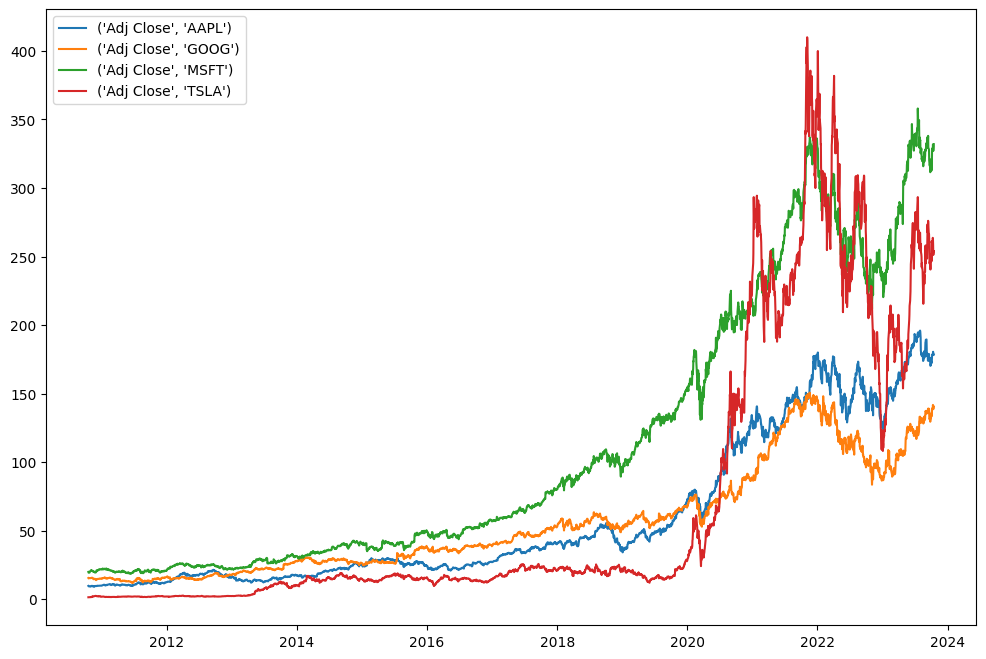

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(stocks)
plt.legend(stocks.columns)
plt.show()

#Exploratory Data Analyses.
* Looking to explore the relationships between prices and returns using our time series data.
* calculate the daily returns (m)

daily percent change = (P_0/P_0-P_1)*100

* calculate the volatility (sigma aka standard deviation)



* calculate the covariances





In [ ]:
#daily returns

stocks_returns = pd.DataFrame(stocks)
stocks_returns['Date'] = stocks_returns.index
stocks_returns.set_index('Date', inplace=True)
stocks_returns.head(10)

stocks_returns['Daily Return', 'AAPL'] = stocks_returns['Adj Close', 'AAPL'] / stocks_returns['Adj Close', 'AAPL'].shift(1) - 1
stocks_returns['Daily Return', 'GOOG'] = stocks_returns['Adj Close', 'GOOG'] / stocks_returns['Adj Close', 'GOOG'].shift(1) - 1
stocks_returns['Daily Return', 'MSFT'] = stocks_returns['Adj Close', 'MSFT'] / stocks_returns['Adj Close', 'MSFT'].shift(1) - 1
stocks_returns['Daily Return', 'TSLA'] = stocks_returns['Adj Close', 'TSLA'] / stocks_returns['Adj Close', 'TSLA'].shift(1) - 1

stocks_returns.head(10)


stocks_returns.dropna(inplace=True)

stocks_returns.head(10)

(stocks_returns)


Adj Close                                     Daily Return  \
                  AAPL        GOOG        MSFT        TSLA         AAPL   
Date                                                                      
2010-10-19    9.369590   15.139005   19.315645    1.336667    -0.026760   
2010-10-20    9.401072   15.142741   19.477245    1.376667     0.003360   
2010-10-21    9.370495   15.242617   19.561899    1.383333    -0.003252   
2010-10-22    9.308433   15.256067   19.531111    1.381333    -0.006623   
2010-10-25    9.349908   15.354946   19.384897    1.390000     0.004456   
...                ...         ...         ...         ...          ...   
2023-10-10  178.155289  139.199997  327.724854  263.619995    -0.003352   
2023-10-11  179.563431  141.699997  331.746674  262.989990     0.007904   
2023-10-12  180.472244  140.289993  330.489227  258.869995     0.005061   
2023-10-13  178.614685  138.580002  327.066193  251.119995    -0.010293   
2023-10-16  178.484863  140.490005  331.966248  253.919998    -0.000727   

                                          
                GOOG      MSFT      TSLA  
Date                                      
2010-10-19 -0.015995 -0.027885 -0.008898  
2010-10-20  0.000247  0.008366  0.029925  
2010-10-21  0.006596  0.004346  0.004842  
2010-10-22  0.000882 -0.001574 -0.001446  
2010-10-25  0.006481 -0.007486  0.006274  
...              ...       ...       ...  
2023-10-10 -0.002151 -0.004336  0.015212  
2023-10-11  0.017960  0.012272 -0.002390  
2023-10-12 -0.009951 -0.003790 -0.015666  
2023-10-13 -0.012189 -0.010357 -0.029938  
2023-10-16  0.013783  0.014982  0.011150  

[3270 rows x 8 columns]

In [ ]:
stock_returns = stocks_returns.drop(columns=['Adj Close'])

stock_returns.head(10)

Daily Return                              
                   AAPL      GOOG      MSFT      TSLA
Date                                                 
2010-10-19    -0.026760 -0.015995 -0.027885 -0.008898
2010-10-20     0.003360  0.000247  0.008366  0.029925
2010-10-21    -0.003252  0.006596  0.004346  0.004842
2010-10-22    -0.006623  0.000882 -0.001574 -0.001446
2010-10-25     0.004456  0.006481 -0.007486  0.006274
2010-10-26    -0.002558  0.003406  0.028186  0.024460
2010-10-27    -0.000714 -0.003443  0.005792 -0.016854
2010-10-28    -0.008414  0.003423  0.008829  0.009048
2010-10-29    -0.013956 -0.007889  0.014840  0.030675
2010-11-01     0.010632  0.002118  0.010499 -0.019689

Daily Return  AAPL    0.001053
              GOOG    0.000822
              MSFT    0.000998
              TSLA    0.002239
dtype: float64
Daily Return  AAPL    0.012631
              GOOG    0.009860
              MSFT    0.011970
              TSLA    0.026867
dtype: float64
Daily Return  AAPL    1.263110
              GOOG    0.986038
              MSFT    1.197015
              TSLA    2.686736
dtype: float64
Daily Return  AAPL    0.017840
              GOOG    0.017075
              MSFT    0.016498
              TSLA    0.035777
dtype: float64
Daily Return  AAPL    0.061799
              GOOG    0.059150
              MSFT    0.057152
              TSLA    0.123937
dtype: float64
Daily Return  AAPL     6.179880
              GOOG     5.915015
              MSFT     5.715221
              TSLA    12.393686
dtype: float64


Text(0, 0.5, 'Return')

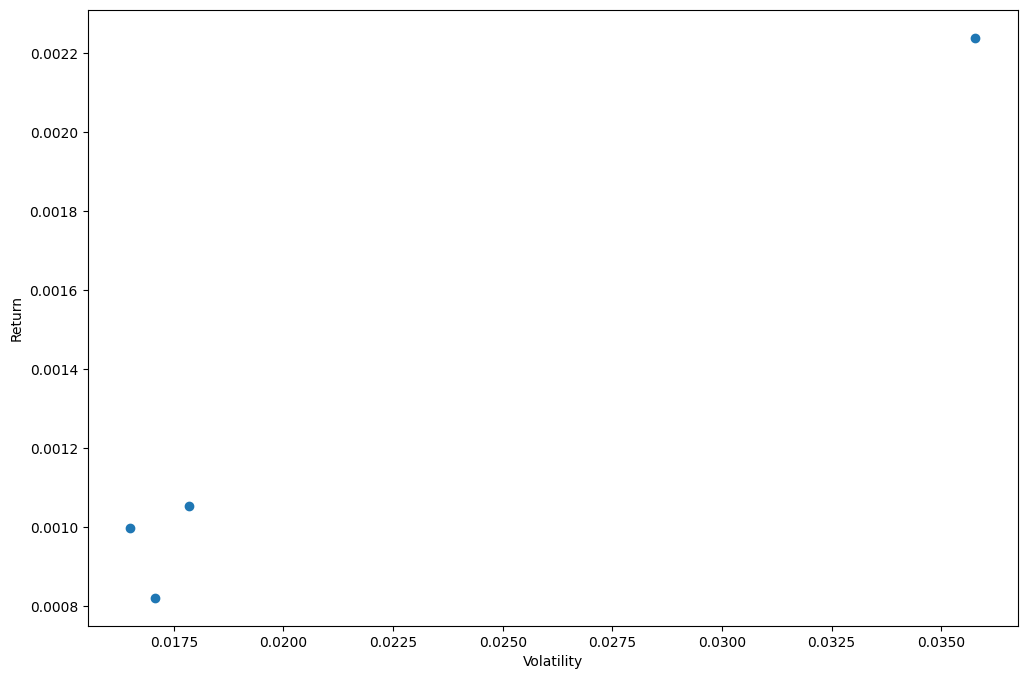

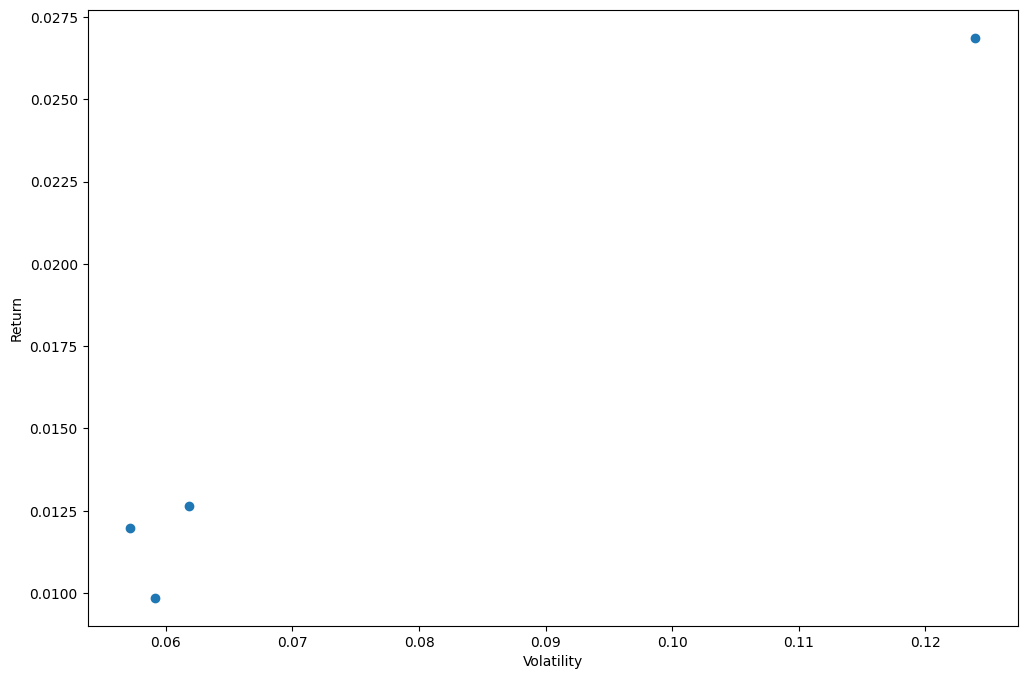

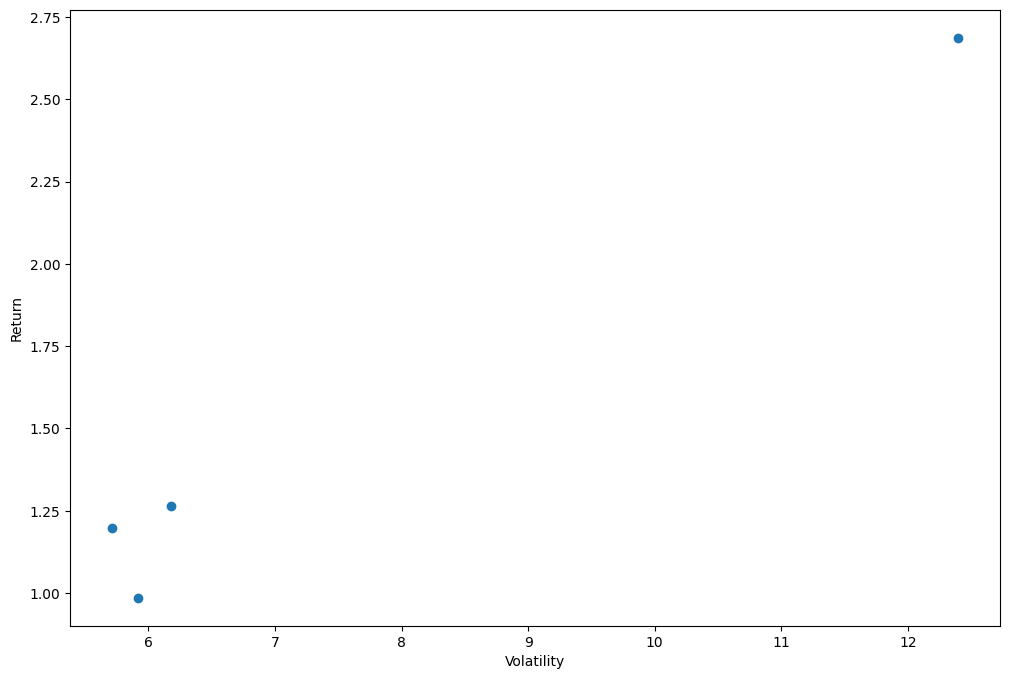

In [ ]:

#daily

stock_returns_daily = stock_returns.sum()/len(stock_returns)

#month

stock_returns_monthly = stock_returns.sum()/len(stock_returns) * 12

#annual
stock_returns_annualized = stock_returns.sum()/len(stock_returns) * 12 * 100


print(stock_returns_daily)
print(stock_returns_monthly)
print(stock_returns_annualized)

#volatility daily
stock_returns_volatility_daily = stock_returns.std()

#volatility monthly
stock_returns_volatility_monthly = stock_returns.std() * np.sqrt(12)

#volatility annual
stock_returns_volatility_annual = stock_returns.std() * np.sqrt(12) * 100

print(stock_returns_volatility_daily)
print(stock_returns_volatility_monthly)
print(stock_returns_volatility_annual)


#plot return vs. volatility daily and show ticker

plt.figure(figsize=(12, 8))
plt.scatter(stock_returns_volatility_daily, stock_returns_daily)
plt.xlabel('Volatility')
plt.ylabel('Return')

#plot return vs. volatility monhly and show ticker

plt.figure(figsize=(12, 8))
plt.scatter(stock_returns_volatility_monthly, stock_returns_monthly)
plt.xlabel('Volatility')
plt.ylabel('Return')

#plot return vs. volatility annual and show ticker

plt.figure(figsize=(12, 8))
plt.scatter(stock_returns_volatility_annual, stock_returns_annualized)
plt.xlabel('Volatility')
plt.ylabel('Return')





Daily Return  AAPL   -0.026684
              GOOG   -0.025406
              MSFT   -0.024501
              TSLA   -0.050910
Name: 0.05, dtype: float64


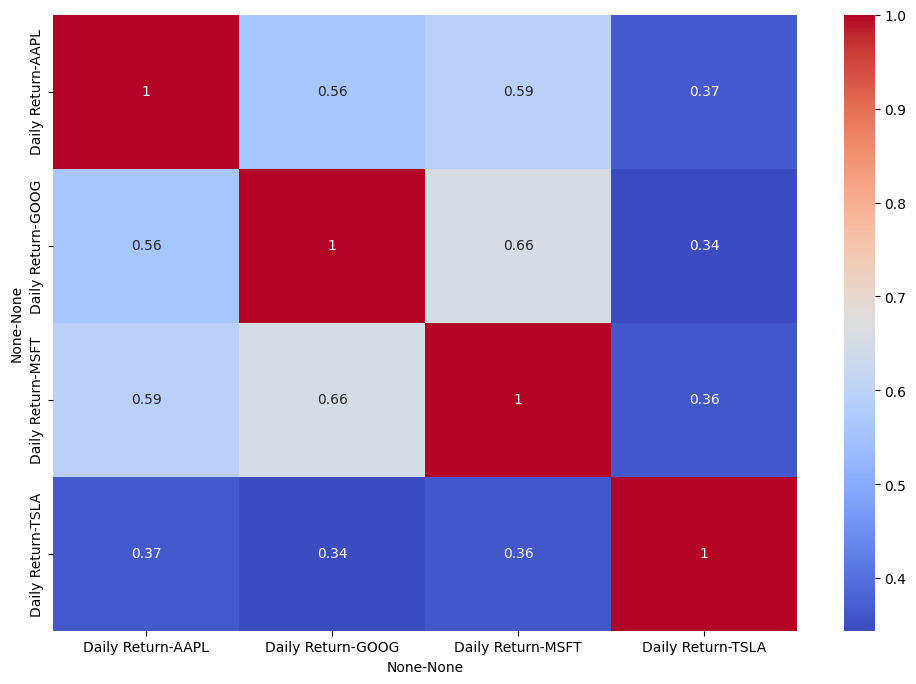

In [ ]:
#correlation of daily returns

stock_returns.corr()

#correlation graph of daily returns

plt.figure(figsize=(12, 8))
sns.heatmap(stock_returns.corr(), annot=True, cmap='coolwarm')

#VaR at 95th interval given investment of 100000

VaR = stock_returns.quantile(0.05)

print(VaR)

<ipython-input-149-3bc5695f1c5c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_returns['Daily Return', 'MSFT'], color='blue', label='MSFT')
<ipython-input-149-3bc5695f1c5c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_returns['Daily Return', 'GOOG'], color='red', label='GOOG')

ValueError: ignored

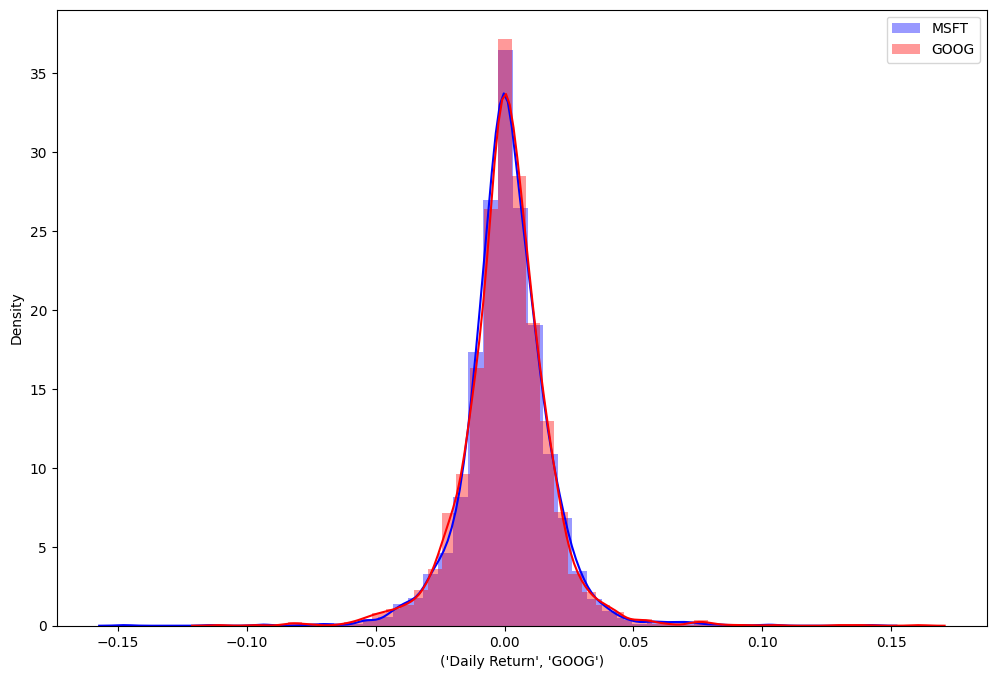

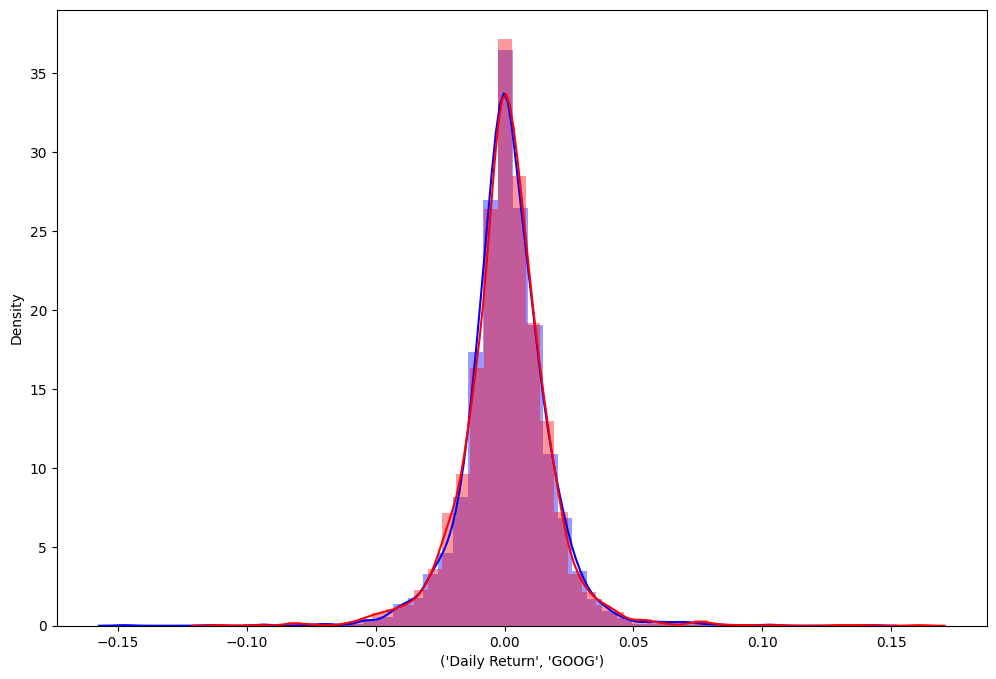

In [ ]:
#histogram of daily correlation for MSFT and GOOG

plt.figure(figsize=(12, 8))
sns.distplot(stock_returns['Daily Return', 'MSFT'], color='blue', label='MSFT')
sns.distplot(stock_returns['Daily Return', 'GOOG'], color='red', label='GOOG')
plt.legend()

#VaR at 95th interval given investment of $1000000 times VaR plot on histogram

plt.figure(figsize=(12, 8))
sns.distplot(stock_returns['Daily Return', 'MSFT'], color='blue', label='MSFT')
sns.distplot(stock_returns['Daily Return', 'GOOG'], color='red', label='GOOG')
plt.axvline(x=VaR, color='black', linestyle='--', label='VaR')
plt.legend()

#Print monetary value on graph

plt.figure(figsize=(12, 8))
sns.distplot(stock_returns['Daily Return', 'MSFT'], color='blue', label='MSFT')
sns.distplot(stock_returns['Daily Return', 'GOOG'], color='red', label='GOOG')
plt.axvline(x=VaR, color='black', linestyle='--', label='VaR')
plt.legend()
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.title('Daily Return Distribution')